In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import math

locations = gpd.read_file(r"D:\JP CERTIFICATES\IITK\Course summerterm\AArcGIS project\python_integration\Decimal Degrees to DMS\Decimal Degrees to DMS\Shapefiles\locations.shp")

In [2]:
locations['Lon_DD'] = locations['geometry'].x
locations['Lat_DD'] = locations['geometry'].y

locations['Lon_DMS'] = ''
locations['Lat_DMS'] = ''

print(locations.head())

   Id   stn_name                   geometry      Lon_DD    Lat_DD Lon_DMS  \
0   0  station 1  POINT (103.72060 1.33680)  103.720602  1.336804           
1   0  station 2  POINT (103.92405 1.76511)  103.924046  1.765107           
2   0  station 3  POINT (103.48861 1.67945)  103.488605  1.679446           
3   0  station 4  POINT (103.09599 1.80080)  103.095994  1.800798           
4   0  station 5  POINT (103.51716 1.95427)  103.517159  1.954274           

  Lat_DMS  
0          
1          
2          
3          
4          


In [3]:
# For longitude 

for index, row in locations.iterrows():
    if row['Lon_DD'] > 0:
        hemisphere = 'E'
    elif row['Lon_DD'] < 0:
        hemisphere = 'W'
        
    degrees_lon = int(abs(math.modf(row['Lon_DD'])[1]))
    minutes_lon = int(abs(math.modf(math.modf(row['Lon_DD'])[0]*60)[1]))
    seconds_lon = abs(math.modf(math.modf(row['Lon_DD'])[0]*60)[0]*60)
    seconds_lon = round(seconds_lon, 3)
    
    locations.loc[index, 'Lon_DMS'] = str(degrees_lon) + u"\u00b0 " + str(minutes_lon) + "' " + str(seconds_lon) + "\" " + hemisphere


print(locations.head())

   Id   stn_name                   geometry      Lon_DD    Lat_DD  \
0   0  station 1  POINT (103.72060 1.33680)  103.720602  1.336804   
1   0  station 2  POINT (103.92405 1.76511)  103.924046  1.765107   
2   0  station 3  POINT (103.48861 1.67945)  103.488605  1.679446   
3   0  station 4  POINT (103.09599 1.80080)  103.095994  1.800798   
4   0  station 5  POINT (103.51716 1.95427)  103.517159  1.954274   

              Lon_DMS Lat_DMS  
0  103° 43' 14.169" E          
1  103° 55' 26.567" E          
2  103° 29' 18.978" E          
3   103° 5' 45.578" E          
4   103° 31' 1.771" E          


In [4]:
# For latitude 

for index, row in locations.iterrows():
    if row['Lat_DD'] > 0:
        hemisphere = 'N'
    elif row['Lat_DD'] < 0:
        hemisphere = 'S' 
        
    degrees_lat = int(abs(math.modf(row['Lat_DD'])[1]))
    minutes_lat = int(abs(math.modf(math.modf(row['Lat_DD'])[0]*60)[1]))
    seconds_lat = abs(math.modf(math.modf(row['Lat_DD'])[0]*60)[0]*60)
    seconds_lat = round(seconds_lat, 3)    
    
    locations.loc[index, 'Lat_DMS'] = str(degrees_lat) + u"\u00b0 " + str(minutes_lat) + "' " + str(seconds_lat) + "\" " + hemisphere

print(locations.head())

   Id   stn_name                   geometry      Lon_DD    Lat_DD  \
0   0  station 1  POINT (103.72060 1.33680)  103.720602  1.336804   
1   0  station 2  POINT (103.92405 1.76511)  103.924046  1.765107   
2   0  station 3  POINT (103.48861 1.67945)  103.488605  1.679446   
3   0  station 4  POINT (103.09599 1.80080)  103.095994  1.800798   
4   0  station 5  POINT (103.51716 1.95427)  103.517159  1.954274   

              Lon_DMS           Lat_DMS  
0  103° 43' 14.169" E  1° 20' 12.493" N  
1  103° 55' 26.567" E  1° 45' 54.384" N  
2  103° 29' 18.978" E  1° 40' 46.005" N  
3   103° 5' 45.578" E   1° 48' 2.874" N  
4   103° 31' 1.771" E  1° 57' 15.385" N  


   Id   stn_name                   geometry      Lon_DD    Lat_DD  \
0   0  station 1  POINT (103.72060 1.33680)  103.720602  1.336804   
1   0  station 2  POINT (103.92405 1.76511)  103.924046  1.765107   
2   0  station 3  POINT (103.48861 1.67945)  103.488605  1.679446   
3   0  station 4  POINT (103.09599 1.80080)  103.095994  1.800798   
4   0  station 5  POINT (103.51716 1.95427)  103.517159  1.954274   

              Lon_DMS           Lat_DMS  \
0  103° 43' 14.169" E  1° 20' 12.493" N   
1  103° 55' 26.567" E  1° 45' 54.384" N   
2  103° 29' 18.978" E  1° 40' 46.005" N   
3   103° 5' 45.578" E   1° 48' 2.874" N   
4   103° 31' 1.771" E  1° 57' 15.385" N   

                                             label  
0  station 1\n103° 43' 14.169" E\n1° 20' 12.493" N  
1  station 2\n103° 55' 26.567" E\n1° 45' 54.384" N  
2  station 3\n103° 29' 18.978" E\n1° 40' 46.005" N  
3    station 4\n103° 5' 45.578" E\n1° 48' 2.874" N  
4   station 5\n103° 31' 1.771" E\n1° 57' 15.385" N  


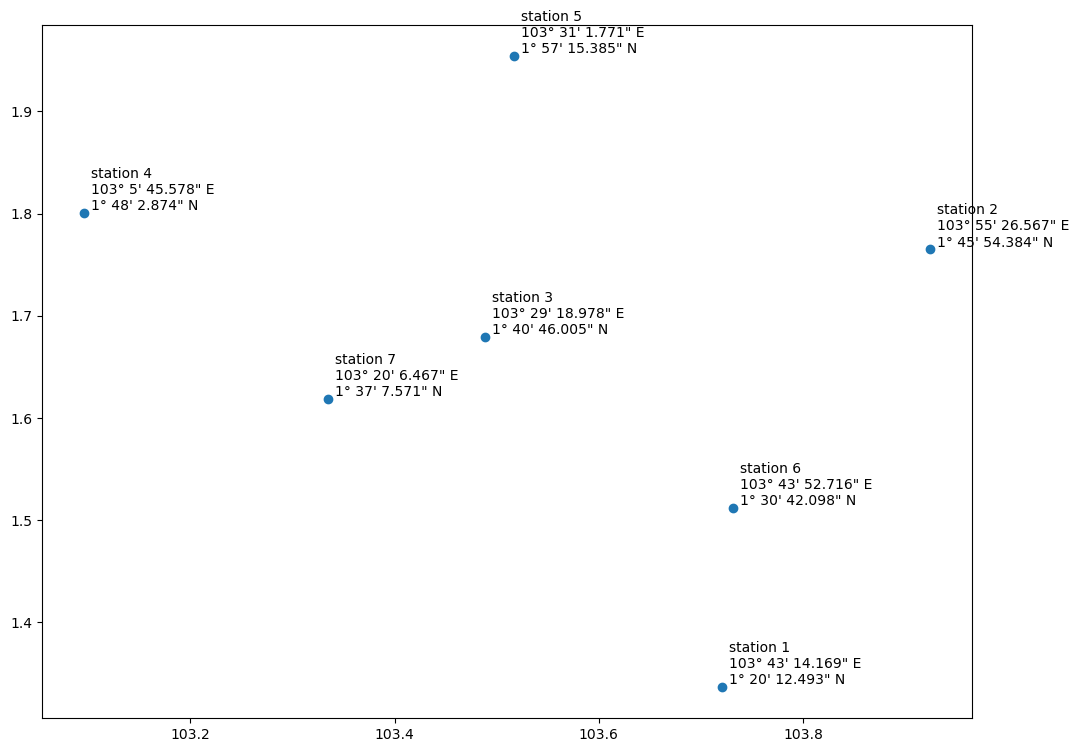

In [5]:
locations['label'] = locations['stn_name'] + '\n' + locations['Lon_DMS'] + '\n' + locations['Lat_DMS']
    
ax = locations.plot(figsize = (12,12))

for x, y, label in zip(locations.geometry.x, locations.geometry.y, locations.label):
    ax.annotate(label, xy = (x, y), xytext = (5, 2), textcoords = "offset points")


print(locations.head())